<a href="https://colab.research.google.com/github/PramithaMJ/CNN/blob/main/CNN_Demo_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Implementation with PyTorch

Dataset: CIFAR10 (Ref: https://www.cs.toronto.edu/~kriz/cifar.html)
Info: <br>
> Number of Images: 60000,  32 * 32 in resolution
> Number of Classes: 10 (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck)

**Prerequisites**
> PyTorch Basics: https://youtu.be/OIenNRt2bjg
> Python Basics: https://youtu.be/rfscVS0vtbw

**References:**
1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-Regularization-in-PyTorch--VmlldzoxNTgwOTE
3. https://medium.com/artificialis/dropout-regularization-using-pytorch-in-python-7765337cb158
3. https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
4. https://pytorch.org/vision/main/datasets.html
5. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
6. https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.

## Load Google Drive

In [1]:
# Load Google drive to Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load the Necessary Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

## Define transforms (Data Augmentation)

In [3]:
# Define transforms

# For training set
train_transforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# For testing set
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


**Tensors**
> - Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
> - Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.
> - Tensors are also optimized for automatic differentiation.


# Load datasets and define the

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets (https://pytorch.org/vision/main/datasets.html).

> PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [4]:
# Load datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:04<00:00, 41260308.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
# Define batch size
batch_size = 25

# created dataloaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

**Try!**
Here we have used only two sets are training and the testing tests. However, for the hyperparameter tuning we need the validation set as well. Therefore, find out a solution to split the test set into two and, redo the dataset loading and dataloader preparation.

In [6]:
# Define the classes in the dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Display a Sample of Images

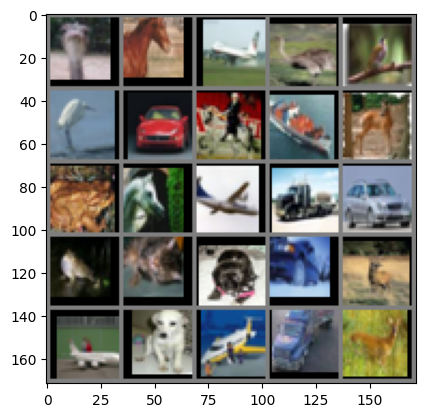

In [8]:
# Visualize a batch of images

def imshow(img):
    img = img / 2 + 0.5;  # Unnormalized
    # Convert image into a Numpy Array for data manipuation and usage in
    # matplotlib
    npimg = img.numpy()
    # In numpy images defined as no. of channels, height, width format
    # However, matplotlib expects in height, width, channels format
    # So, we need to transform the npimg.
    plt.imshow(npimg.transpose((1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images,nrow=5))


## Define CNN

In [9]:
# Define the CNN model
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolutional block 1
        x = self.pool(nn.ReLU()(self.conv1(x)))

        # Convolutional block 2
        x = self.pool(nn.ReLU()(self.conv2(x)))

        # Flatten the output
        x = torch.flatten(x, 1)

        # Fully connected layers
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)

        return x


In [10]:
# Initialize a instance of the model
model = CNNModel()


## Define the Device

In [ ]:
# If cuda GPU is available, it will be set as the device otherwise cpu

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cpu


In [ ]:
# Transfer model to the device
model.to(device)


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Generate model summary
from torchsummary import summary

summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


## Define the Loss Function and Optimizer

In [ ]:
# Define loss function and the optimizer



## Train the model

In [ ]:
# Train the defined model



## Model Saving and Loading

In [ ]:
# Saving



In [ ]:
# Loading



In [ ]:
# Once more send the model to the device after loading



## Performance with Testset

In [ ]:
# Measure performance of the test set



**Try!**
In the above cases, we did not utilized any validation set and no hyperparameter tuning has been performed either. So model performance should be able to improve by performing some hyperparameter tuning.

**Try!**
Furthermore, try to measure the training and validation set losses/accuracies within the training loop and plot them in a single plot. In this way, we will be able to identify whether model is overfitting or not. In the above case, neither training or validation losses/accuracies were calculated. Try to record the performance once per certain number of batches.

**Try!**
Try to integrate early stopping into the training loop when the model performance w.r.t the validation set is no longer improving with further training. Try to think of a possible logic and add that into the training loop accordingly.

## Performance for Different Classes

In [ ]:
# Measure the performance w.r.t each class

